Modification of the 1st version: Add construction period...investment ramped linearly over the construction period

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
def NPV(construction_period,n,r,cf,It0,OMkwh,OMfixed,wholesale_price):
    prod=cf*1*365*24
    constructiont=int(round(construction_period))
    It=np.zeros(n+constructiont)
    #It[0]=It0
    Mt=np.ones(n+constructiont)*(OMkwh*prod+OMfixed)
    Et=np.ones(n+constructiont)*prod  #kwH
    for x in range(constructiont):
        It[x]=It0/constructiont  #spread the investment evenly over the construction period
        Mt[x]=0   #No costs or production during construction
        Et[x]=0
    discounted_benefits=0.0
    discounted_costs=0.0
    for x in range(n+constructiont):
        t=x
        benefit=Et[x]*(wholesale_price/1000)/np.power((1+r),t)
        cost=(It[x]+Mt[x])/np.power((1+r),t)
        discounted_benefits=discounted_benefits+benefit
        discounted_costs=discounted_costs+cost
    return discounted_benefits-discounted_costs
    

# Histogram of all sources together loop over something

In [20]:
#Nuclear parameters from DIW report
It0=4000  #Euros/kW
n=40      #years
nw=25
ns=25
now=25
cf=0.9
r=0.04    #Discount rate
OMkwh=0.012  #Euros/kWh variable O&M
OMfixed=90   #Euros/kW fixed O&M
OMkwhw=0.005  #Euros/kWh variable O&M
OMfixedw=30   #Euros/kW fixed O&M
OMkwhow=0.0  #Euros/kWh variable O&M
OMfixedow=100   #Euros/kW fixed O&M
OMkwhs=0.0  #Euros/kWh variable O&M
wholesale_price=80  #Euros/MWh
construction_period=6   #years...rounded to integer here
construction_periodw=4 
construction_periodow=6
construction_periods=3

In [21]:
#Testing that the function works reasonably
NPV_nuclear=NPV(construction_period,n,r,cf,It0,OMkwh,OMfixed,wholesale_price)/1000   #Billions for a GW plant

In [22]:
NPV_nuclear

3.622898767913338

In [34]:
CO2min=0
CO2max=40
CO2samples=21
CO2taxv=np.linspace(CO2min,CO2max,CO2samples)
samples=100000
NPV_nuclearv=np.zeros(samples)
NPV_windv=np.zeros(samples)
NPV_owindv=np.zeros(samples)
NPV_solarv=np.zeros(samples)
rmin=0.04
rmax=0.1
Itmin=4000
Itmax=9000
wholesalemin=20
wholesalemax=80
Itminw=1500
Itmaxw=2000
Itminow=3100
Itmaxow=4700
cfminw=0.2
cfmaxw=0.37
cfminow=0.37
cfmaxow=0.51
Itmins=600
Itmaxs=1400
cfmins=0.09
cfmaxs=0.12

In [35]:
bins_fixed = np.linspace(-1.25, 2.2, 100)

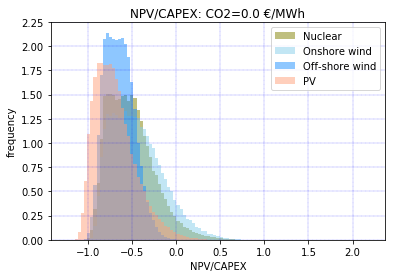

In [ ]:
for co in range(CO2samples):
    filename= "./Figs/All_together_NPV_relative_to_capex_taxes" + str(co)+ ".png"
    CO2tax=CO2taxv[co]
    for x in range(samples):        
        It0=np.random.uniform(low=Itmin,high=Itmax)
        It0w=np.random.uniform(low=Itminw,high=Itmaxw)
        It0ow=np.random.uniform(low=Itminow,high=Itmaxow)
        It0s=np.random.uniform(low=Itmins,high=Itmaxs)
        wholesale_price=np.random.uniform(low=wholesalemin,high=wholesalemax)+CO2tax
        r=np.random.uniform(low=rmin,high=rmax)
        cfw=np.random.uniform(low=cfminw,high=cfmaxw)
        cfs=np.random.uniform(low=cfmins,high=cfmaxs)
        cfow=np.random.uniform(low=cfminow,high=cfmaxow)
        OMfixeds=0.025*It0s   #2.5% of capex
        NPV_nuclearv[x]=NPV(construction_period,n,r,cf,It0,OMkwh,OMfixed,wholesale_price)/It0   
        NPV_windv[x]=NPV(construction_periodw,nw,r,cfw,It0w,OMkwhw,OMfixedw,wholesale_price)/It0w
        NPV_solarv[x]=NPV(construction_periods,ns,r,cfs,It0s,OMkwhs,OMfixeds,wholesale_price)/It0s
        NPV_owindv[x]=NPV(construction_periodow,now,r,cfow,It0ow,OMkwhow,OMfixedow,wholesale_price)/It0ow
    #plt.hist([NPV_nuclearv], bins=75,alpha=0.5,density=True,color = ["olive"],label='Nuclear')
    #plt.hist([NPV_windv], bins=75,alpha=0.5,density=True,color = ["skyblue"],label='Onshore wind')
    #plt.hist([NPV_owindv], bins=75,alpha=0.5,density=True,color = ["dodgerblue"],label='Off-shore wind')
    #plt.hist([NPV_solarv], bins=75,alpha=0.5,density=True,color = ["lightsalmon"],label='PV')
    plt.hist([NPV_nuclearv], bins_fixed,alpha=0.5,density=True,color = ["olive"],label='Nuclear')
    plt.hist([NPV_windv], bins_fixed,alpha=0.5,density=True,color = ["skyblue"],label='Onshore wind')
    plt.hist([NPV_owindv], bins_fixed,alpha=0.5,density=True,color = ["dodgerblue"],label='Off-shore wind')
    plt.hist([NPV_solarv], bins_fixed,alpha=0.5,density=True,color = ["lightsalmon"],label='PV')
    plt.legend(loc='upper right')
    plt.title("NPV/CAPEX: CO2="+str(CO2tax)+" €/MWh")
    plt.xlabel("NPV/CAPEX")
    plt.ylabel("frequency")
    plt.grid(color='b', linestyle='--', linewidth=0.25)
    plt.savefig(filename)
    plt.show()